In [7]:
import pandas as pd
import numpy as np
import plotly.express as ex
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('googleplaystore.csv')
df.drop_duplicates(inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
df.Installs = df.Installs.str.replace('+', '')
df.Installs = df.Installs.str.replace(',', '')

In [10]:
# line = df[df.Installs == 'Free']; line = 10472
df.drop(10472, axis=0, inplace=True)

In [11]:
df.Installs = df.Installs.astype(int)
df.Reviews = df.Reviews.astype(int)

In [12]:
df_m = df[df.Size.str.contains('k', regex=False)]
df_m.Size = df_m.Size.str.replace('k','').astype(float)
df_m.Size = df_m.Size/1000

/Users/slava/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
df.Size.update(df_m.Size)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [17]:
df.Size = df.Size.str.replace('M', '')
df.Size = df.Size.replace('Varies with device', np.nan)
df.Size = df.Size.astype(float)
df['Size'] = df.groupby('Category')['Size'].transform(lambda grp: grp.fillna(np.mean(grp)))
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.500000,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13.722872,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [18]:
df.Price = df.Price.str.replace('$', '')
df.Price = df.Price.astype(float)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.500000,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13.722872,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


<AxesSubplot:xlabel='Type', ylabel='count'>

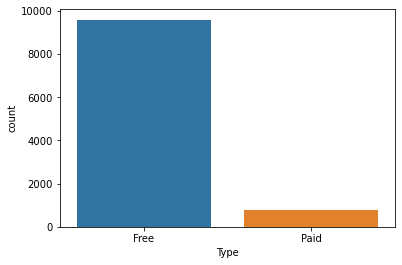

In [19]:
sns.countplot(data=df, x='Type')

In [20]:
ex.pie(df.groupby('Type').count(), values='App', names=['Free', 'Paid'])

In [21]:
free_apps = df[df.Type == 'Free']
paid_apps = df[df.Type == 'Paid']
total_price = paid_apps.Price * paid_apps.Installs
paid_apps['total_price'] = total_price
ex.pie(paid_apps, values='total_price', names='Category')

<ipython-input-21-ab7e9065f750>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
market_capital = paid_apps.groupby(
    'Category'
).sum().total_price.sort_values()

ex.bar(x=market_capital.values[10:], y=market_capital.index[10:])

In [23]:
most_downloads = df.groupby('Category').Installs.sum().sort_values(ascending=False)
ex.bar(y=most_downloads.values, x=most_downloads.index)

In [24]:
expensive_apps = df.groupby('Category').Price.max().sort_values(ascending=True)
ex.bar(x=expensive_apps.values[7:], y=expensive_apps.index[7:])

In [27]:
top_free_apps = free_apps.sort_values(by=['Installs'], ascending=False)[['App', 'Installs']][0:20]
top_free_apps

,App,Installs
3523,Google Drive,1000000000
9844,Google News,1000000000
2808,Google Photos,1000000000
1654,Subway Surfers,1000000000
2853,Google Photos,1000000000
2884,Google Photos,1000000000
1700,Subway Surfers,1000000000
4170,Google Drive,1000000000
4153,Hangouts,1000000000
4150,Google,1000000000


In [28]:
ex.box(paid_apps.Size, labels={'y': 'MBytes'})

In [29]:
downloads = df.groupby('Type').sum()
downloads

,Rating,Reviews,Size,Installs,Price
Type,,,,,
Free,34626.3,4194850131,207388.545863,146562688646,0.0
Paid,2612.3,9103921,15706.544121,69225881,10676.0


In [30]:
ex.pie(downloads, values='Installs')

In [37]:
top_family_apps = paid_apps[paid_apps.Category == 'FAMILY'].sort_values(by=['Installs'], ascending=False)
ex.bar(x=top_family_apps.App[:10], y=top_family_apps.Installs[:10])

In [45]:
top_family_genres = top_family_apps.groupby('Genres').sum().sort_values(by='Installs', ascending=False)
ex.pie(top_family_genres, values='Installs', names=top_family_genres.index)

In [49]:
df_family = df[df.Category == 'FAMILY']
all_installs = df_family.Installs.sum()
df_family.Installs = df_family.Installs/all_installs * 100
df_family.sort_values(by=['Installs'], ascending=False)[0:50].drop_duplicates(inplace=True)
df_family.sort_values(by=['Installs'], ascending=False)[0:20][['App', 'Installs']].drop(4527)

/Users/slava/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App,Installs
5856,Google Play Games,9.958481
3879,Pou,4.979240
3888,My Talking Tom,4.979240
3994,Candy Crush Saga,4.979240
10186,Farm Heroes Saga,0.995848
4797,Talking Tom & Ben News,0.995848
6269,Bitmoji – Your Personal Emoji,0.995848
6849,Bubble Witch 2 Saga,0.995848
2206,ROBLOX,0.995848
2056,Duolingo: Learn Languages Free,0.995848


<AxesSubplot:>

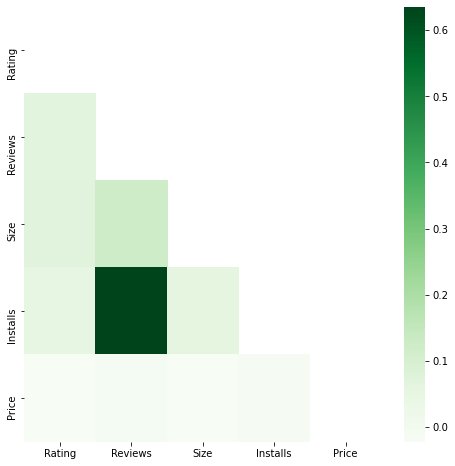

In [51]:
corr_df = df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']]
plt.figure(figsize=(8,8))
matrix = np.triu(corr_df.corr())
sns.heatmap(corr_df.corr(), cmap='Greens', mask=matrix)

In [52]:
ex.scatter(df, x = np.log(df.Installs), y=np.log(df.Reviews), labels={'x': 'Installs', 'y': 'Reviews'})

/Users/slava/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log

